In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import time
import re

In [2]:
from collections import defaultdict

In [3]:
seasons = list(range(1951, 2021))

In [4]:
target_fields = ['pts', 'fg', 'fga', 'fta', 'orb', 'trb', 'ast', 'tov']

In [5]:
all_data = []
for season in seasons:
    print(f"Current Season: {season}")
    url = f"https://www.basketball-reference.com/leagues/NBA_{season}.html"
    res = requests.get(url)
    text = res.text
    text = text.replace('<!--', '')
    text = text.replace('--!>', '')
    soup = BeautifulSoup(text)
    item = soup.find_all(attrs={'class': 'table_container'})
    if season > 2015:
        #result = text.split('<div class="table_container">')[6]
        soup = item[5]
    elif season > 1970:
        #result = text.split('<div class="table_container">')[4]
        soup = item[3]
    else:
        #result = text.split('<div class="table_container">')[3]
        soup = item[2]
    #soup = BeautifulSoup(result)
    columns = list(soup.find(attrs={'class': 'stats_table'}).children)[5]
    data = list(soup.find(attrs={'class': 'stats_table'}).children)[7]
    
    season_data = []
    for item in data.findAll("tr"):
        cur_dict = {}
        for it in item.findAll("td"):
            if it.attrs['data-stat'].strip() in target_fields:
                value = 0.0
                if it.text.strip() != '':
                    value = float(it.text)
                cur_dict[it.attrs['data-stat'].strip()] = value
        cur_dict['season'] = season
        season_data.append(cur_dict)
    all_data.append(pd.DataFrame(season_data))
    time.sleep(0.2)

Current Season: 1951
Current Season: 1952
Current Season: 1953
Current Season: 1954
Current Season: 1955
Current Season: 1956
Current Season: 1957
Current Season: 1958
Current Season: 1959
Current Season: 1960
Current Season: 1961
Current Season: 1962
Current Season: 1963
Current Season: 1964
Current Season: 1965
Current Season: 1966
Current Season: 1967
Current Season: 1968
Current Season: 1969
Current Season: 1970
Current Season: 1971
Current Season: 1972
Current Season: 1973
Current Season: 1974
Current Season: 1975
Current Season: 1976
Current Season: 1977
Current Season: 1978
Current Season: 1979
Current Season: 1980
Current Season: 1981
Current Season: 1982
Current Season: 1983
Current Season: 1984
Current Season: 1985
Current Season: 1986
Current Season: 1987
Current Season: 1988
Current Season: 1989
Current Season: 1990
Current Season: 1991
Current Season: 1992
Current Season: 1993
Current Season: 1994
Current Season: 1995
Current Season: 1996
Current Season: 1997
Current Seaso

In [6]:
concat_df = pd.concat(all_data)

In [7]:
grouped_df = concat_df.groupby('season').agg(
{
    'fta': 'mean'
}).reset_index()

In [8]:
grouped_df

,season,fta
0,1951,33.418182
1,1952,33.250000
2,1953,35.880000
3,1954,33.055556
4,1955,31.933333
5,1956,38.050000
6,1957,36.950000
7,1958,38.275000
8,1959,36.312500
9,1960,35.850000


In [9]:
plt.style.use('fivethirtyeight')

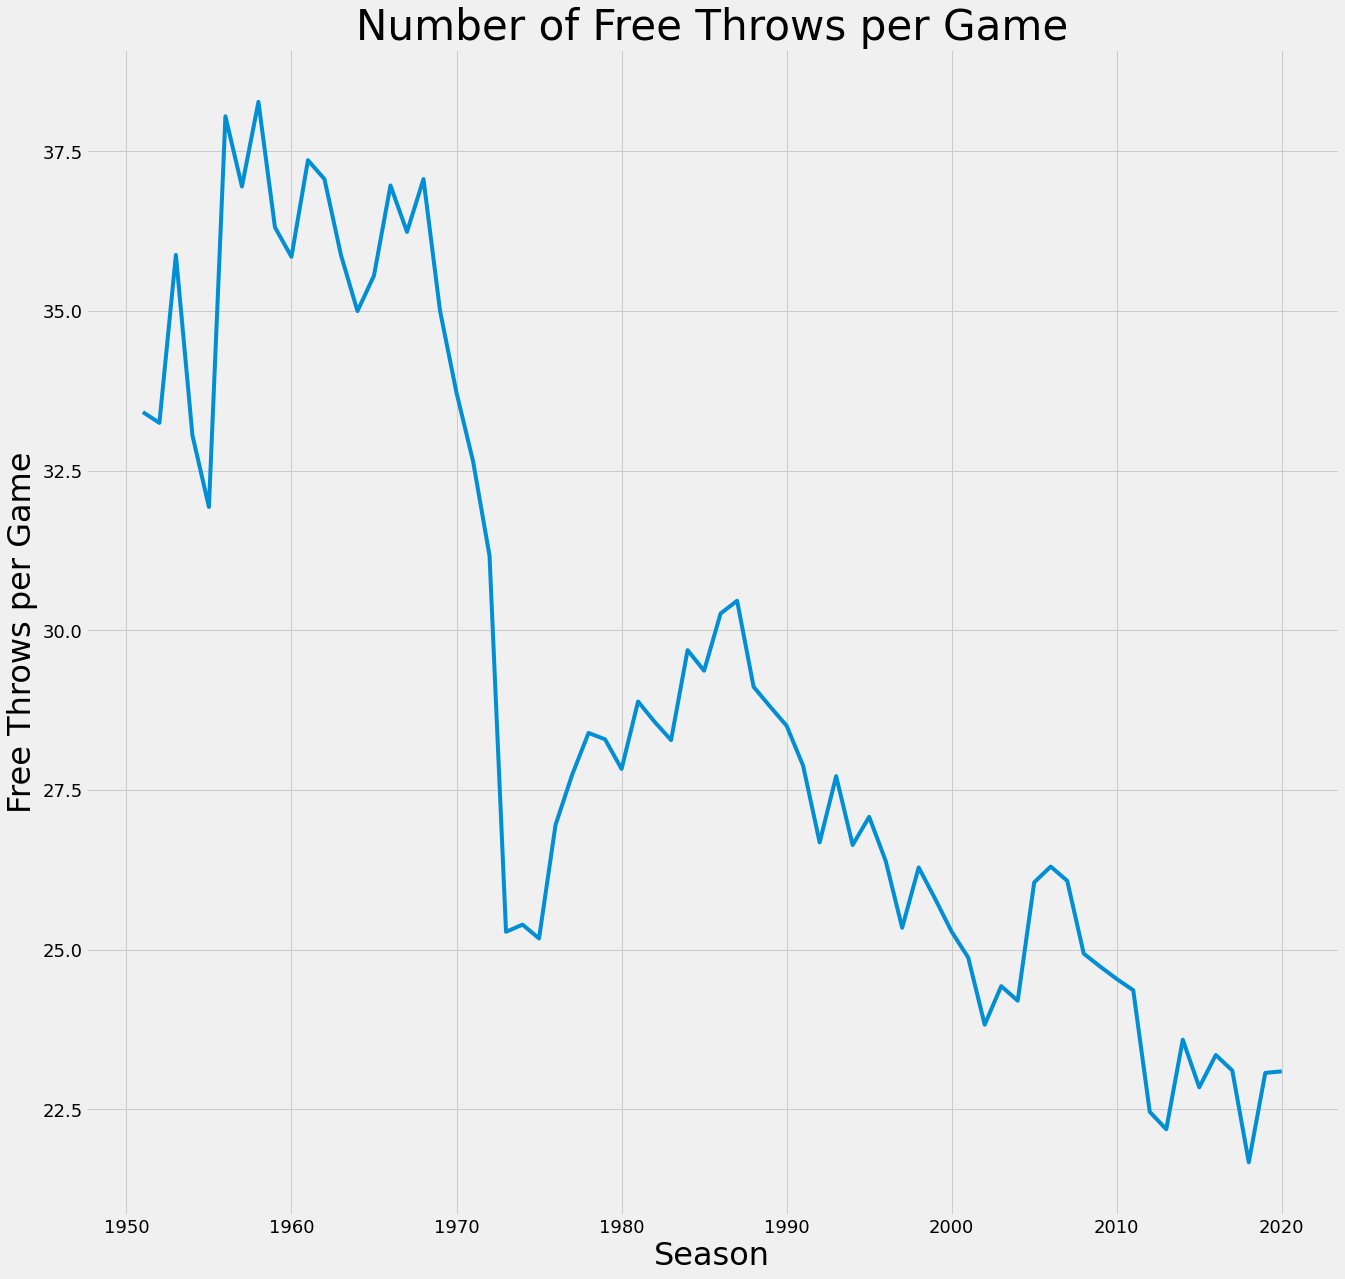

In [10]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.plot(grouped_df.season, grouped_df.fta)
ax.set_xlabel("Season", size=32)
ax.set_ylabel("Free Throws per Game", size=32)
ax.set_title("Number of Free Throws per Game", size=42)
ax.tick_params(labelsize=18)